In [1]:
print("Stock Market Analysis")

Stock Market Analysis


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
# 10 years data
start = '2014-07-31'
end ='2024-07-31'
stock = 'AAPL'

data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace = True)
#open - morning price
#high - highest price on that day
#close - final price before closing


In [17]:
data.reset_index(inplace =True)

In [18]:
data

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2014-07-31,24.290001,24.362499,23.832500,23.900000,21.140387,227372000
1,1,2014-08-01,23.725000,24.155001,23.702499,24.032499,21.257591,194044000
2,2,2014-08-04,24.092501,24.145000,23.792500,23.897499,21.138182,159832000
3,3,2014-08-05,23.840000,23.920000,23.590000,23.780001,21.034248,223732000
4,4,2014-08-06,23.687500,23.870001,23.677500,23.740000,20.998867,154232000
...,...,...,...,...,...,...,...,...
2511,2511,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.539993,61777600
2512,2512,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.490005,51391200
2513,2513,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.960007,41601300
2514,2514,2024-07-29,216.960007,219.300003,215.750000,218.240005,218.240005,36311800


In [19]:
# moving average 100 days
ma_100_days = data.Close.rolling(100).mean()

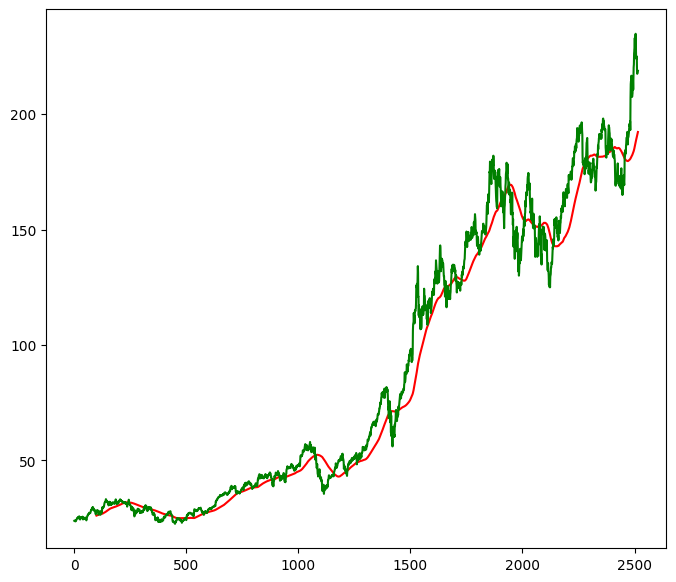

In [20]:
plt.figure(figsize=(8,7))
plt.plot(ma_100_days,'red')
plt.plot(data.Close,'green')
plt.show()

In [21]:
# moving average 200 days
ma_200_days = data.Close.rolling(200).mean()

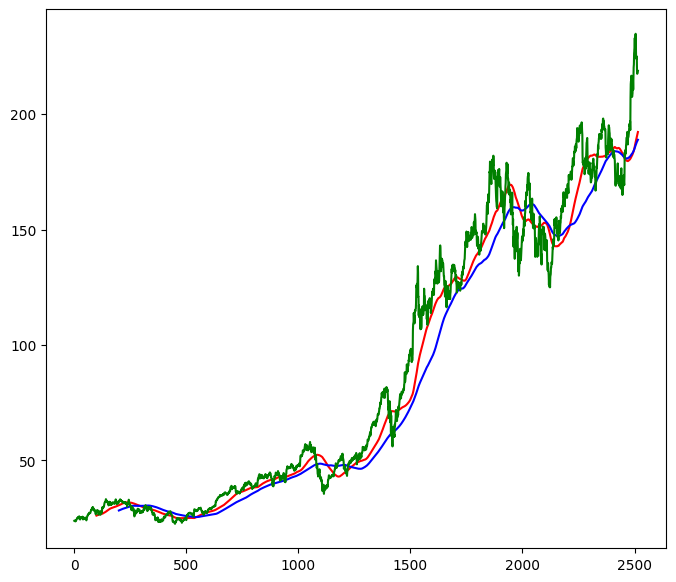

In [22]:
plt.figure(figsize = (8,7))
plt.plot(ma_100_days, 'red')
plt.plot(ma_200_days, 'blue')
plt.plot(data.Close,'green')
plt.show()

In [23]:
data

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2014-07-31,24.290001,24.362499,23.832500,23.900000,21.140387,227372000
1,1,2014-08-01,23.725000,24.155001,23.702499,24.032499,21.257591,194044000
2,2,2014-08-04,24.092501,24.145000,23.792500,23.897499,21.138182,159832000
3,3,2014-08-05,23.840000,23.920000,23.590000,23.780001,21.034248,223732000
4,4,2014-08-06,23.687500,23.870001,23.677500,23.740000,20.998867,154232000
...,...,...,...,...,...,...,...,...
2511,2511,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.539993,61777600
2512,2512,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.490005,51391200
2513,2513,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.960007,41601300
2514,2514,2024-07-29,216.960007,219.300003,215.750000,218.240005,218.240005,36311800


In [24]:
data.dropna(inplace =True)

## test

In [38]:
data_train = pd.DataFrame(data.Close[0 : int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80) : len(data)])

In [39]:
print("data shape :",data.shape)
print("train data :",data_train.shape[0])
print("test_data  :",data_test.shape[0])

data shape : (2516, 8)
train data : 2012
test_data  : 504


Slicing

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))

In [41]:
data_train_scale = scaler.fit_transform(data_train)

In [42]:
# # # first n days - to predict stock price of 11 day, it will take consideration of first 10 days
# 10,11,12,15,16,17,18,19,20

In [44]:
x= []
y= []

for  i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100 : i])
    y.append(data_train_scale[i,0])

In [45]:
x, y=np.array(x), np.array(y)

In [46]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [47]:
model = Sequential()

# Add LSTM layers with Dropout
model.add(LSTM(units=50, activation ='relu', return_sequences=True,
               input_shape=((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,  activation ='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation ='relu',  return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [48]:
model.compile(optimizer ='adam', loss ='mean_squared_error')

In [49]:
model.fit(x,y,epochs = 50 , batch_size = 32, verbose =1)

Epoch 1/50
60/60 [==============================] - 58s 748ms/step - loss: 0.0301
Epoch 2/50
60/60 [==============================] - 21s 345ms/step - loss: 0.0069
Epoch 3/50
60/60 [==============================] - 18s 307ms/step - loss: 0.0069
Epoch 4/50
60/60 [==============================] - 16s 259ms/step - loss: 0.0052
Epoch 5/50
60/60 [==============================] - 16s 273ms/step - loss: 0.0048
Epoch 6/50
60/60 [==============================] - 18s 296ms/step - loss: 0.0050
Epoch 7/50
60/60 [==============================] - 18s 296ms/step - loss: 0.0043
Epoch 8/50
60/60 [==============================] - 19s 315ms/step - loss: 0.0047
Epoch 9/50
60/60 [==============================] - 19s 311ms/step - loss: 0.0043
Epoch 10/50
60/60 [==============================] - 19s 310ms/step - loss: 0.0047
Epoch 11/50
60/60 [==============================] - 19s 312ms/step - loss: 0.0039
Epoch 12/50
60/60 [==============================] - 16s 268ms/step - loss: 0.0041
Epoch 13/50
6

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [74]:
# last 100 days data from training data
past_100_days = data_train.tail(100)
data_test = pd.concat([past_100_days, data_test], ignore_index = True)
data_test_scale = scaler.fit_transform(data_test)

In [75]:
x= []
y= []

for  i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x),np.array(y)

In [76]:
y_predict = model.predict(x)

29/29 [==============================] - 3s 86ms/step


In [78]:
y_predict

array([[0.21302593],
       [0.21872248],
       [0.22463948],
       [0.23076312],
       [0.23729646],
       [0.24408533],
       [0.2505979 ],
       [0.25602886],
       [0.26012617],
       [0.2631591 ],
       [0.26559865],
       [0.268072  ],
       [0.27132037],
       [0.2763954 ],
       [0.28383684],
       [0.29399526],
       [0.307067  ],
       [0.32268256],
       [0.34034735],
       [0.35919896],
       [0.37775683],
       [0.39445454],
       [0.40883738],
       [0.420412  ],
       [0.42849523],
       [0.4327651 ],
       [0.43326575],
       [0.4298135 ],
       [0.42304832],
       [0.41437566],
       [0.40444195],
       [0.39379466],
       [0.3833052 ],
       [0.37370938],
       [0.36537838],
       [0.3578459 ],
       [0.35082313],
       [0.3435681 ],
       [0.3357632 ],
       [0.3279993 ],
       [0.32047343],
       [0.31335133],
       [0.30691904],
       [0.30184335],
       [0.29792303],
       [0.29480806],
       [0.2918868 ],
       [0.288

In [83]:
scale =1/scaler.scale_

In [84]:
y_predict = y_predict * scale 
# predicted value

In [85]:
y =y * scale   
# actual value

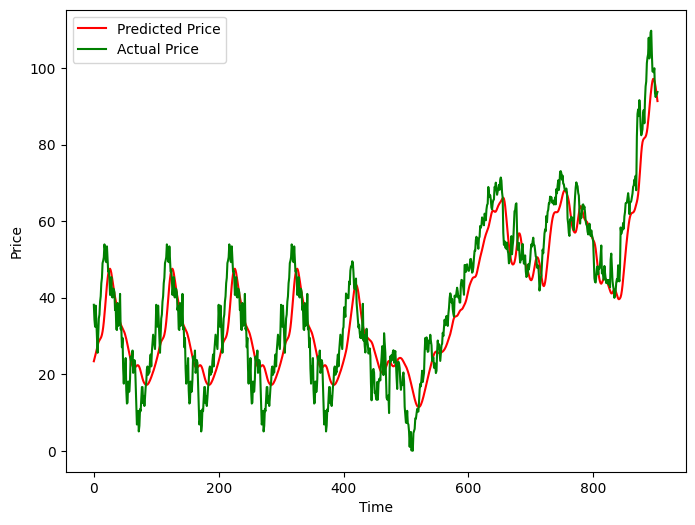

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Actual Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [95]:
model.save('Stock Prediction Model.keras')